<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Urinary essential elements of young children with autism spectrum disorder and their mothers

- [Mendeley Reference](https://data.mendeley.com/datasets/79fk29dvk6/1)
- [Science Direct Reference](https://www.sciencedirect.com/science/article/abs/pii/S1750946720300088?via%3Dihub)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

### Table of Contents <a class="anchor" id="PAN_toc"></a>

* [Table of Contents](#PAN_toc)
    * [1. Abstract](#PAN_page_1)
    * [2. Imported Libraries](#PAN_page_2)
    * [3. Import the Dataset](#PAN_page_3)
    * [4. Setting Notebook Options](#PAN_page_4)
    * [5. Looking at the Data](#PAN_page_5)
    * [6. Checking the Column Names](#PAN_page_6)
    * [7. Cleaning the Column Names](#PAN_page_7)
    * [8. Creating a new Cleaned Dataset](#PAN_page_8)
    * [9. Counting Columns](#PAN_page_9)
    * [10. Get Info about the Dataset](#PAN_page_10)
    * [11. Get Descriptive Statistics about the Dataset](#PAN_page_11)
    * [12. Counting Rows and Removing any NANs](#PAN_page_12)
    * [13. Correlation Analysis](#PAN_page_13)
    * [14. Principal Component Analysis (PCA)](#PAN_page_14)
    * [15. Group Comparison](#PAN_page_15)
    * [16. Fisher's Discriminant Analysis and Support Vector Machines (SVM)](#PAN_page_16)
    * [17. Groupby Function](#PAN_page_17)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 1 - Abstract <a class="anchor" id="PAN_page_1"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

### Background
Even though the cause of autism spectrum disorders (ASD) remains unknown, the current understanding points towards complex interactions between environmental and genetic factors. One important environmental factor to consider is intake of toxic and essential elements, and their role in metabolism. Essential elements have received considerably less attention in the literature than the presence of toxins in urine.

### Method
The purpose of this investigation is to comprehensively assess the association between urinary element compositions of 28 mothers who had young children with ASD and 29 mothers who had young typically developing (TD) children, and in a subset of their children (21 with ASD and 26 TD).

### Results
The results show that there are significant differences between the ASD and TD children cohorts’ concentrations for four specific elements (sulfur, phosphorous, molybdenum, and tin). Utilizing multivariate statistical techniques (Fisher’s discriminant analysis and support vector machines), it was possible to distinguish the ASD from the TD children groups with an 81 % accuracy after cross-validation utilizing the four significantly different elements. However, among the mother cohorts assessed, there were no significant differences between those that had children with ASD and those with TD children. There was a significant correlation of levels of phosphorus and sulfur in the children with ASD (r = 0.63, p = 3.0E-3) and in the TD children (r = 0.47, p = 0.02).

### Conclusions
Notable differences were observed between the elemental concentration in urine of children with ASD and their TD peers. Analyzing cellular pathways related to these elements are promising areas of future research.

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 2 - Imported Libraries<a class="anchor" id="PAN_page_2"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


In [2]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 3 - Import the Dataset <a class="anchor" id="PAN_page_3"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [3]:
data = pd.read_excel("../Data/DATA.xlsx")

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 4 - Setting Notebook Options<a class="anchor" id="PAN_page_4"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [4]:
# reset the options
pd.reset_option('display.max_rows')

# set the option to display the maximum number of columns
pd.set_option('display.max_columns', 50)

# set the option to display the maximum number of rows
pd.set_option('display.min_rows', 105)
pd.set_option('display.max_rows', 105)

pd.describe_option('display.max_rows')
pd.describe_option('display.max_columns')

display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, or
    IDLE do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 60] [currently: 105]
display.max_columns : int
    If max_cols is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the width of the te

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 5 - Looking at the Data<a class="anchor" id="PAN_page_5"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [5]:
data

,'ID Number','Status','Type','Aluminum','Antimony','Arsenic','Barium','Beryllium','Bismuth','Cadmium','Cesium','Gadolinium','Lead','Mercury','Nickel','Palladium','Platinum','Tellurium','Thallium','Thorium','Tin','Tungsten','Uranium','Boron','Calcium','Chromium','Cobalt','Copper','Iron','Lithium','Magnesium','Manganese','Molybdenum','Phosphorus','Potassium','Selenium','Sodium','Strontium','Sulfur','Vanadium','Zinc','Creatinine'
0,1,'ASD','Child',7.000000,0.200000,11.000000,2.100000,0.000707,0.000113,0.000141,4.3,0.000099,0.200000,0.000424,4.900000,0.000849,0.000113,0.000566,0.100000,0.000042,1.600000,0.300000,0.000071,2.30,140.0,0.000424,0.001131,0.014,0.240000,0.083,200,0.000700,0.130,1180,24,0.110,56,0.130,680,0.000283,0.660,175.0
1,3,'ASD','Child',19.000000,0.200000,8.100000,8.000000,0.000354,0.000057,0.000071,16.0,0.000049,1.000000,0.000212,2.900000,0.000424,0.000057,0.000283,0.600000,0.000021,1.000000,0.200000,0.000035,4.90,81.0,0.000212,0.000566,0.018,0.200000,0.170,170,0.005000,0.180,360,120,0.094,290,0.170,860,0.000500,0.480,76.0
2,5,'ASD','Child',9.200000,0.000057,5.900000,4.700000,0.000354,0.200000,0.000071,11.0,0.000049,0.500000,0.000212,9.400000,0.000424,0.000057,0.000283,0.300000,0.000021,8.400000,0.600000,0.000035,2.90,300.0,0.000600,0.003000,0.021,0.600000,0.170,310,0.004000,0.170,1860,120,0.110,240,0.370,1050,0.000600,0.750,58.6
3,6,'ASD','Child',8.400000,0.000057,14.000000,3.000000,0.000354,0.000057,0.000071,16.0,0.000049,0.900000,0.000212,15.000000,0.000424,0.000057,0.000283,0.400000,0.000021,1.400000,0.300000,0.000035,8.60,200.0,0.001000,0.000566,0.024,0.430000,0.061,390,0.005000,0.043,150,120,0.069,190,0.330,630,0.000400,0.240,54.3
4,8,'ASD','Child',5.600000,0.000028,11.000000,3.800000,0.000177,0.000028,0.000035,4.5,0.000025,0.400000,1.000000,2.500000,0.000212,0.000028,0.000141,0.400000,0.000011,0.600000,0.300000,0.000018,1.30,62.0,0.001000,0.000283,0.022,0.035355,0.220,170,0.007000,0.085,910,180,0.140,190,0.120,1290,0.000800,0.270,30.6
5,10,'ASD','Child',17.000000,0.600000,15.000000,3.100000,0.000354,0.000057,0.000071,10.0,0.000049,0.500000,0.000212,5.200000,0.000424,0.000057,0.000283,0.200000,0.000021,0.500000,0.100000,0.000035,4.50,250.0,0.001000,0.000566,0.019,0.530000,0.120,180,0.002000,0.110,1200,54,0.180,330,0.240,800,0.000500,1.100,70.6
6,12,'ASD','Child',9.500000,0.000057,120.000000,4.200000,0.000354,0.000057,0.200000,5.7,0.000049,0.300000,0.000212,6.700000,0.000424,0.000057,0.000283,0.300000,0.000021,0.200000,0.300000,0.000035,3.80,340.0,0.000500,0.001000,0.018,0.630000,0.083,230,0.002000,0.100,1320,45,0.130,120,0.290,1090,0.000141,0.660,82.1
7,17,'ASD','Child',6.800000,0.200000,35.000000,4.000000,0.000707,0.000113,0.000141,3.3,33.000000,0.400000,0.000424,9.700000,0.000849,0.000113,0.000566,0.090000,0.000042,4.000000,1.200000,0.000071,2.20,170.0,0.001000,0.000900,0.018,0.300000,0.140,120,0.000400,0.140,260,14,0.089,91,0.350,670,0.000900,0.690,172.0
8,19,'ASD','Child',24.000000,0.200000,14.000000,2.600000,0.000354,0.000057,0.000071,4.4,0.000049,0.500000,0.000212,3.800000,0.000424,0.000057,0.000283,0.600000,0.000021,2.000000,0.070000,0.000035,4.50,150.0,0.000212,0.000566,0.020,0.340000,0.084,110,0.006000,0.058,810,120,0.091,200,0.260,690,0.000600,0.740,87.4
9,20,'ASD','Child',21.000000,0.070000,12.000000,1.800000,0.000354,0.000057,0.200000,3.6,0.000049,0.100000,0.000212,1.300000,0.000424,0.000057,0.000283,0.200000,0.000021,0.200000,0.200000,0.000035,2.40,38.0,0.000400,0.000566,0.020,0.070711,0.055,150,0.002000,0.083,900,51,0.100,45,0.060,990,0.000200,0.500,123.0


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 6 - Checking the Column Names<a class="anchor" id="PAN_page_6"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [6]:
# check the column names - notice the extra ' single quote
print(data.columns)

Index([''ID Number'', ''Status'', ''Type'', ''Aluminum'', ''Antimony'',
       ''Arsenic'', ''Barium'', ''Beryllium'', ''Bismuth'', ''Cadmium'',
       ''Cesium'', ''Gadolinium'', ''Lead'', ''Mercury'', ''Nickel'',
       ''Palladium'', ''Platinum'', ''Tellurium'', ''Thallium'', ''Thorium'',
       ''Tin'', ''Tungsten'', ''Uranium'', ''Boron'', ''Calcium'',
       ''Chromium'', ''Cobalt'', ''Copper'', ''Iron'', ''Lithium'',
       ''Magnesium'', ''Manganese'', ''Molybdenum'', ''Phosphorus'',
       ''Potassium'', ''Selenium'', ''Sodium'', ''Strontium'', ''Sulfur'',
       ''Vanadium'', ''Zinc'', ''Creatinine''],
      dtype='object')


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 7 - Cleaning the Column Names<a class="anchor" id="PAN_page_7"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [7]:
# clean up the column names removing the extra '
data.columns = data.columns.str.replace("'", "")

In [8]:
# check the column names
print(data.columns)

Index(['ID Number', 'Status', 'Type', 'Aluminum', 'Antimony', 'Arsenic',
       'Barium', 'Beryllium', 'Bismuth', 'Cadmium', 'Cesium', 'Gadolinium',
       'Lead', 'Mercury', 'Nickel', 'Palladium', 'Platinum', 'Tellurium',
       'Thallium', 'Thorium', 'Tin', 'Tungsten', 'Uranium', 'Boron', 'Calcium',
       'Chromium', 'Cobalt', 'Copper', 'Iron', 'Lithium', 'Magnesium',
       'Manganese', 'Molybdenum', 'Phosphorus', 'Potassium', 'Selenium',
       'Sodium', 'Strontium', 'Sulfur', 'Vanadium', 'Zinc', 'Creatinine'],
      dtype='object')


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 8 - Creating a new Cleaned Dataset<a class="anchor" id="PAN_page_8"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


In [9]:
data.to_csv("../Data/clean_data.csv", index=False)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 9 - Counting Columns<a class="anchor" id="PAN_page_9"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


In [10]:
# Count the number of columns
num_cols = data.shape[1]

print(num_cols)

42


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 10 - Get Info about the Dataset<a class="anchor" id="PAN_page_10"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


In [11]:
# usually objects are you key factors/independent variables where floats and ints are continuous/dependent variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID Number   105 non-null    int64  
 1   Status      105 non-null    object 
 2   Type        105 non-null    object 
 3   Aluminum    105 non-null    float64
 4   Antimony    105 non-null    float64
 5   Arsenic     105 non-null    float64
 6   Barium      105 non-null    float64
 7   Beryllium   105 non-null    float64
 8   Bismuth     105 non-null    float64
 9   Cadmium     105 non-null    float64
 10  Cesium      105 non-null    float64
 11  Gadolinium  105 non-null    float64
 12  Lead        105 non-null    float64
 13  Mercury     105 non-null    float64
 14  Nickel      105 non-null    float64
 15  Palladium   105 non-null    float64
 16  Platinum    105 non-null    float64
 17  Tellurium   105 non-null    float64
 18  Thallium    105 non-null    float64
 19  Thorium     105 non-null    f

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 11 - Get Descriptive Statistics about the Dataset<a class="anchor" id="PAN_page_11"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


## Descriptive statistics:
basic descriptive statistics such as mean, median, mode, standard deviation, variance, range, and percentiles can be computed for each element to summarize its distribution.

In [12]:
# Drop the first column since we don't need ID Number, but notice Status and Type not used
dataset_filtered = data.drop(data.columns[0], axis=1)

# Calculate summary statistics for each element
summary_statistics = dataset_filtered.describe()

# Print the summary statistics
print(summary_statistics)


         Aluminum    Antimony     Arsenic      Barium   Beryllium     Bismuth  \
count  105.000000  105.000000  105.000000  105.000000  105.000000  105.000000   
mean     9.368598    0.059104   13.691641    2.718096    0.000458    0.315303   
std     12.035546    0.135363   16.684145    2.526504    0.000168    1.613558   
min      0.001414    0.000028    0.001061    0.000071    0.000177    0.000028   
25%      2.500000    0.000057    5.000000    1.100000    0.000354    0.000057   
50%      5.600000    0.000113   11.000000    1.900000    0.000354    0.000057   
75%     10.000000    0.070000   15.000000    3.300000    0.000707    0.000113   
max     74.000000    0.900000  120.000000   15.000000    0.000707   13.000000   

          Cadmium      Cesium  Gadolinium        Lead     Mercury      Nickel  \
count  105.000000  105.000000  105.000000  105.000000  105.000000  105.000000   
mean     0.084427    5.382857    0.315966    0.374105    0.104033    4.049527   
std      0.124575    3.3977

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 12 - Counting Rows and Removing any NANs<a class="anchor" id="PAN_page_12"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


In [13]:
# count the number of rows using len()
num_rows = len(data)
print('Number of rows:', num_rows)

Number of rows: 105


In [14]:
# drop rows with missing values if there are any
data = data.dropna()

In [15]:
# count the number of rows using len()
num_rows = len(data)
print('Number of rows:', num_rows)

Number of rows: 105


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 13 - Correlation Analysis<a class="anchor" id="PAN_page_13"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


## Correlation analysis: 
correlation analysis can be used to determine the strength and direction of the relationship between different elements. This can help identify the elements that are strongly related to each other and may have a common source.

In [17]:
# Calculate the correlation matrix
corr_matrix = dataset_filtered.corr()

# View the correlation matrix
#print(corr_matrix)
corr_matrix

,Aluminum,Antimony,Arsenic,Barium,Beryllium,Bismuth,Cadmium,Cesium,Gadolinium,Lead,Mercury,Nickel,Palladium,Platinum,Tellurium,Thallium,Thorium,Tin,Tungsten,Uranium,Boron,Calcium,Chromium,Cobalt,Copper,Iron,Lithium,Magnesium,Manganese,Molybdenum,Phosphorus,Potassium,Selenium,Sodium,Strontium,Sulfur,Vanadium,Zinc,Creatinine
Aluminum,1.000000,0.532296,0.031023,0.561186,-0.313495,-0.087201,-0.182321,0.453143,-0.021330,0.725451,-0.177115,0.295885,-0.313495,-0.313495,-0.313495,0.394521,-0.313495,0.320742,0.214864,0.291031,0.603613,0.271930,0.182968,-0.106711,0.378699,0.247920,0.188302,0.373055,0.604131,0.199987,0.320706,0.342633,0.303722,0.302600,0.341868,0.292267,0.384464,0.437954,-0.321199
Antimony,0.532296,1.000000,-0.010960,0.484427,-0.209752,-0.084805,-0.218317,0.513796,0.102337,0.449560,-0.161072,0.214894,-0.209752,-0.209752,-0.209752,0.350666,-0.209752,0.238305,0.222868,0.110501,0.491555,0.161993,0.156073,-0.203784,0.366781,0.067553,0.195354,0.302425,0.376494,0.249705,0.420342,0.280343,0.472690,0.405663,0.248954,0.288167,0.345519,0.335905,-0.204249
Arsenic,0.031023,-0.010960,1.000000,0.161066,-0.131157,0.198150,0.031913,0.128612,0.125722,0.128677,0.206379,0.260092,-0.131157,-0.131157,-0.131157,0.154223,-0.131157,0.074626,0.151141,0.007994,0.210529,0.305217,0.060902,0.009817,0.236953,0.316601,0.189789,0.158090,0.099874,0.237693,0.072081,0.055149,0.236785,0.114267,0.305293,0.195046,0.063726,0.167114,-0.159852
Barium,0.561186,0.484427,0.161066,1.000000,-0.385239,-0.066116,-0.271425,0.588356,0.049607,0.700279,-0.047586,0.524874,-0.385239,-0.385239,-0.385239,0.413731,-0.385239,0.311581,0.264532,0.200961,0.566061,0.607971,-0.037510,-0.086025,0.539845,0.566208,0.348844,0.536562,0.559368,0.322346,0.388129,0.364859,0.392447,0.540400,0.707209,0.378205,0.334026,0.407007,-0.399711
Beryllium,-0.313495,-0.209752,-0.131157,-0.385239,1.000000,-0.085161,0.303654,-0.477927,0.147322,-0.374315,-0.089416,-0.272355,1.000000,1.000000,1.000000,-0.428571,1.000000,-0.198651,-0.121862,-0.124036,-0.400119,-0.284208,0.179564,0.245151,-0.462320,-0.229203,-0.356545,-0.425584,-0.414037,-0.184318,-0.301654,-0.416752,-0.445297,-0.456737,-0.380233,-0.486205,-0.111567,-0.296892,0.865015
Bismuth,-0.087201,-0.084805,0.198150,-0.066116,-0.085161,1.000000,0.111266,-0.068446,-0.019243,-0.028829,0.404030,-0.035272,-0.085161,-0.085161,-0.085161,0.063289,-0.085161,-0.091177,-0.120151,-0.044087,-0.049364,0.026306,-0.074184,-0.109473,-0.062355,0.019324,0.004628,-0.123067,-0.060311,-0.079916,-0.102857,-0.091591,-0.085143,-0.037871,-0.006128,-0.085310,-0.108672,-0.021175,-0.089311
Cadmium,-0.182321,-0.218317,0.031913,-0.271425,0.303654,0.111266,1.000000,-0.250934,-0.066169,-0.250877,0.285645,-0.108825,0.303654,0.303654,0.303654,-0.173383,0.303654,-0.272819,-0.153712,-0.123585,-0.221402,-0.054788,-0.039434,0.269231,-0.273257,-0.043513,-0.285935,-0.298416,-0.217192,-0.232311,-0.254548,-0.299062,-0.311370,-0.249360,-0.188338,-0.302540,-0.206522,-0.155406,0.332258
Cesium,0.453143,0.513796,0.128612,0.588356,-0.477927,-0.068446,-0.250934,1.000000,-0.060730,0.662181,-0.008569,0.512829,-0.477927,-0.477927,-0.477927,0.656613,-0.477927,0.352597,0.271948,0.060690,0.754425,0.347428,0.049762,-0.076757,0.570014,0.316971,0.392595,0.586727,0.691238,0.364315,0.466380,0.651633,0.563441,0.585585,0.469872,0.533147,0.373248,0.348392,-0.525564
Gadolinium,-0.021330,0.102337,0.125722,0.049607,0.147322,-0.019243,-0.066169,-0.060730,1.000000,0.006165,-0.040569,0.217495,0.147322,0.147322,0.147322,-0.080567,0.147322,0.141470,0.350827,-0.023570,-0.010425,0.037400,0.201049,-0.005598,0.030995,0.023788,0.075326,-0.016377,-0.079193,0.123016,-0.127263,-0.082873,0.023359,-0.043004,0.158949,-0.028156,0.226026,0.072951,0.087401
Lead,0.725451,0.449560,0.128677,0.700279,-0.374315,-0.028829,-0.250877,0.662181,0.006165,1.000000,-0.052586,0.423283,-0.374315,-0.374315,-0.374315,0.495932,-0.374315,0.392469,0.268550,0.252778,0.693443,0.394253,0.115620,-0.146478,0.484835,0.402899,0.312126,0.446077,0.743243,0.238619,0

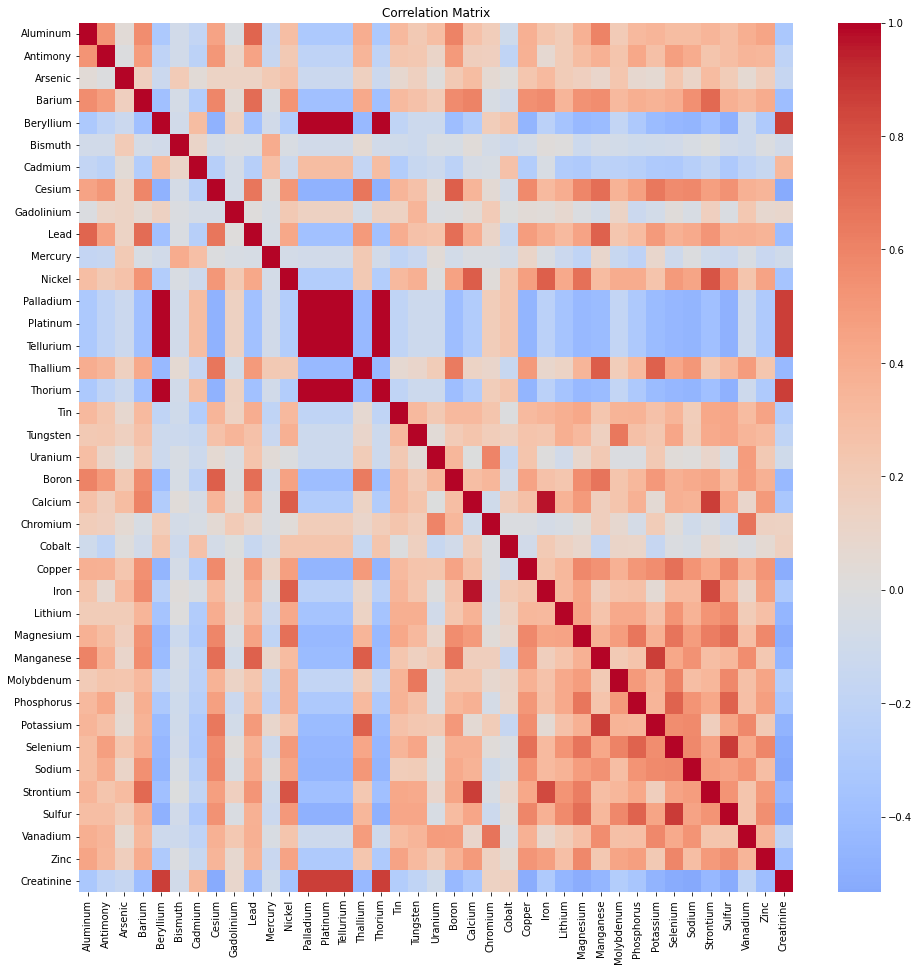

In [19]:
# Plot the correlation matrix using a heatmap
# Set the figure size (width, height) in inches
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 14 - Principal Component Analysis (PCA)<a class="anchor" id="PAN_page_14"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


## Principal component analysis (PCA): 
PCA is a technique used to reduce the dimensionality of a data set by identifying the underlying structure in the data. This technique can be used to identify the most important elements that explain the majority of the variation in the data.

In [223]:
# Separate the features (elements) from the target variable (status)
X = data.drop(['ID Number', 'Status', 'Type'], axis=1)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(X)

# View the explained variance ratio for each principal component
print(pca.explained_variance_ratio_)

[8.21284032e-01 1.22954102e-01 2.48527121e-02 1.63049604e-02
 7.87756879e-03 4.17822035e-03 1.69153873e-03 5.52613242e-04
 2.49412097e-04 2.26399891e-05 1.16009079e-05 5.69540505e-06
 5.28703230e-06 5.05172922e-06 2.40209546e-06 1.69186770e-06
 1.17741490e-07 1.08855319e-07 9.77403577e-08 8.01258834e-08
 2.34111648e-08 1.84953377e-08 9.78519512e-09 5.40080898e-09
 3.64400680e-09 2.41344127e-09 1.76675172e-09 1.60552387e-09
 3.45930875e-10 3.78358016e-11 4.26781941e-13 3.29829283e-13
 8.60169875e-14 3.71575744e-14 1.01506175e-14 7.12395348e-33
 7.12395348e-33 7.12395348e-33 7.12395348e-33]


This code first separates the features (elements) from the target variable (status) by dropping the non-feature columns. Then, it initializes a PCA object and uses the fit_transform() method to perform PCA on the features.

The resulting principal_components array contains the transformed data, where each row represents an observation and each column represents a principal component. You can use this array in downstream analysis or visualization.

Finally, the explained_variance_ratio_ attribute of the PCA object contains an array of the explained variance ratio for each principal component. This can be useful for determining how much of the total variance in the data is explained by each component.

The output is the explained variance ratio for each principal component obtained from the PCA.

The first value, 0.821, indicates that the first principal component explains approximately 82.1% of the total variance in the data. The second value, 0.123, indicates that the second principal component explains approximately 12.3% of the total variance, while the third value, 0.025, explains approximately 2.5% of the total variance. The fourth value, 0.016, explains approximately 1.6% of the total variance, and so on.

The remaining values indicate that the remaining principal components explain progressively less of the total variance, with the last four values being very close to zero. This suggests that the majority of the variance in the data can be explained by the first few principal components, and the remaining components may not be as important in explaining the variation in the data.

Overall, this information can be useful in deciding how many principal components to retain for subsequent analysis or visualization. In general, a common rule of thumb is to retain enough principal components to explain at least 80% of the total variance. In this case, the first two principal components alone explain approximately 94.4% of the total variance, which suggests that the data may be effectively summarized using these components.

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 15 - Group Comparison<a class="anchor" id="PAN_page_15"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


## Group comparison:
statistical tests such as t-tests or ANOVA can be used to compare the mean levels of different elements between different groups (ASD vs TD, children vs mothers). This can help identify the elements that are significantly different between the groups.

The independent variable for an ANOVA is the categorical variable that divides the data into groups. The dependent variable is the continuous variable that will be tested for significant differences between the groups.

Looking at the dataset, the categorical variables are 'Status' and 'Type', while the continuous variables are 'Aluminum', 'Antimony', 'Arsenic', 'Barium', 'Beryllium', 'Bismuth', 'Cadmium', 'Cesium', 'Gadolinium', 'Lead', 'Mercury', 'Nickel', 'Palladium', 'Platinum', 'Tellurium', 'Thallium', 'Thorium', 'Tin', 'Tungsten', 'Uranium', 'Boron', 'Calcium', 'Chromium', 'Cobalt', 'Copper', 'Iron', 'Lithium', 'Magnesium', 'Manganese', 'Molybdenum', 'Phosphorus', 'Potassium', 'Selenium', 'Sodium', 'Strontium', 'Sulfur', 'Vanadium', 'Zinc', and 'Creatinine'.


To wrangle and automatically scale the data for ANOVA, you can follow these steps:

1. Drop the "ID Number" column from the dataframe as it does not provide any useful information for ANOVA:

In [224]:
data.drop("ID Number", axis=1, inplace=True)

Encode the "Status" and "Type" columns using one-hot encoding:

In [225]:
data = pd.get_dummies(data, columns=["Status", "Type"])

Extract the target variable "Creatinine" and the predictor variables:

In [226]:
y = data["Creatinine"]
X = data.drop("Creatinine", axis=1)

Use StandardScaler to scale the predictor variables:

Here's a brief description of what the code does:

1. First, an instance of the StandardScaler class from the scikit-learn library is created and stored in the scaler variable. The StandardScaler class is used to standardize the features (i.e., predictor variables) of a dataset by removing the mean and scaling to unit variance.

2. The fit_transform() method of the StandardScaler object is then called with the X variable (which presumably contains the predictor variables of the dataset) as the argument. This method performs two steps: it first computes the mean and standard deviation of each feature in X, and then standardizes the features by subtracting the mean and dividing by the standard deviation. The resulting standardized features are stored in a new variable X_scaled.

3. The standardized features stored in X_scaled can now be used as input to a statistical model, such as a linear regression or ANOVA, to make predictions or test hypotheses.

By standardizing the features, the StandardScaler class can help to improve the performance of a statistical model by reducing the impact of features with high variance and preventing features with small variances from being dominated by those with larger variances. This can lead to more stable and accurate results when fitting a model to the data.

In [227]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Question: 
Would we still need to remove outliers when using this process? Since the means are computed and then divided by St. dev, would outliers still throw off the data as significantly?

## Answer:
It depends on the nature and degree of the outliers in the dataset. Outliers can still have a significant impact on the mean and standard deviation of a feature, even after standardization. This is because the mean and standard deviation are sensitive to extreme values and may not accurately represent the distribution of the feature if there are outliers present.

However, the effect of outliers can be reduced to some extent by using robust scaling methods, such as the RobustScaler class in scikit-learn, which are less sensitive to outliers. These methods use robust estimators of central tendency and dispersion, such as the median and interquartile range, instead of the mean and standard deviation. This can make the scaling process more robust to outliers and improve the performance of statistical models.

That being said, it's always a good idea to inspect and handle outliers before performing any statistical analysis on a dataset, regardless of whether scaling is performed or not. Outliers can indicate errors in data collection or processing, or they may be genuine extreme values that require special consideration in the analysis. Removing or adjusting outliers can help to ensure that the statistical models are fit to the underlying patterns in the data and not skewed by extreme values.

Run ANOVA using scaled data:

In [230]:
import scipy.stats as stats
f_val, p_val = stats.f_oneway(*X_scaled.T, y)
print("F-value: ", f_val)
print("p-value: ", p_val)

F-value:  397.0650519915882
p-value:  0.0


To perform a linear model on the data, you can use the LinearRegression class from the scikit-learn library in Python. Here's an example code:

In [231]:
# Extract the target variable "Cesium" and the predictor variables
y = data["Cesium"]
X = data.drop("Cesium", axis=1)

# Create a LinearRegression object and fit the model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients and intercept
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficients:  [-4.13233373e-02  4.49806443e+00 -1.17401112e-02  1.23055880e-01
  5.18378985e+02 -1.65890200e-02  4.73404532e-01 -4.51887906e-02
  2.06274520e+00  9.04940570e-02  1.04108107e-01  6.22054782e+02
  8.29406376e+01  4.14703188e+02  1.87732341e+00  3.11027391e+01
  8.90444647e-02  7.08446939e-01 -1.36616541e+01  9.43708813e-01
 -7.73482057e-04  1.11624066e+03  6.79187251e+01  4.32764851e+01
  9.64331182e-01  2.98360921e+00  6.76993416e-04 -5.00318860e+02
 -3.31760687e-01 -3.21963773e-04  3.75060769e-02 -1.76481551e+01
  6.01169356e-03 -5.21100930e+00  2.69876359e-03 -2.83720513e+03
  3.92234768e-01 -3.75100710e-03  3.87994479e-01 -3.87994477e-01
 -5.46120423e-01  5.46120423e-01]
Intercept:  -1.0206872033694596


In the code above, we first import the necessary libraries and load the data into a pandas dataframe data. We extract the target variable "Cesium" and the predictor variables into separate dataframes y and X.

Next, we create a LinearRegression object called model and fit the model using the fit method with X and y as arguments. This trains the model on the data.

Finally, we print out the coefficients and intercept of the linear regression model using the coef_ and intercept_ attributes of the model object.

Note that in this example, we assume that the target variable is "Cesium" and the predictor variables are all other columns in the dataset. If your data has a different target variable or if you only want to include certain predictor variables in the linear regression, you may need to modify the code accordingly. Additionally, it's important to note that linear regression assumes a linear relationship between the predictor variables and the target variable, and that the assumptions of linear regression need to be checked before drawing conclusions from the model.

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 16 - Fisher's Discriminant Analysis and Support Vector Machines (SVM)<a class="anchor" id="PAN_page_16"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


To run Fisher’s discriminant analysis and support vector machines on this data, you will need to first split the data into training and testing sets using a method such as train_test_split from the sklearn.model_selection module. Then, you can fit the models using the training data and evaluate their performance using the testing data.

Here is an example code snippet that demonstrates how to perform Fisher’s discriminant analysis and support vector machines on this data using Python and scikit-learn:

Let's reuse that clean_data.csv file we created previously during our data wrangling phase

In [236]:
clean_data = pd.read_csv("../Data/clean_data.csv")

In [238]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(clean_data.drop(columns=['ID Number', 'Status', 'Type']), clean_data['Type'], test_size=0.2, random_state=42)


# Fit Fisher's discriminant analysis model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

# Fit support vector machine model
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate model performance
accuracy_lda = accuracy_score(y_test, y_pred_lda)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Accuracy of Fisher's discriminant analysis model:", accuracy_lda)
print("Accuracy of support vector machine model:", accuracy_svm)

Accuracy of Fisher's discriminant analysis model: 0.9523809523809523
Accuracy of support vector machine model: 0.9523809523809523


In this code, the data is split into training and testing sets using train_test_split, with 80% of the data used for training and 20% used for testing. The LinearDiscriminantAnalysis and SVC classes from scikit-learn are used to fit the Fisher’s discriminant analysis and support vector machine models, respectively. The accuracy_score function is used to evaluate the accuracy of the models on the testing data. Finally, the accuracy scores of the two models are printed to the console.

Note that this is just an example code snippet, and you may need to adjust the parameters and settings of the models to obtain the best performance for your specific data and problem.

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 17 - Groupby Function<a class="anchor" id="PAN_page_17"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


groupby is a useful function in pandas that can be used to perform group-wise analysis on the data. Here are some examples of interesting statistical analyses that can be performed using groupby on this type of data.

Mean levels of different elements by group: You can use groupby to compute the mean levels of different elements for different groups, such as ASD vs TD or children vs mothers. For example, the following code computes the mean levels of aluminum, antimony, and arsenic for the ASD and TD groups: 

let's bring in our clean dataset again

In [246]:
clean_data2 = pd.read_csv("../Data/clean_data.csv")

In [247]:
clean_data2.groupby('Type')[['Aluminum', 'Antimony', 'Arsenic']].mean()


,Aluminum,Antimony,Arsenic
Type,,,
'Child',15.736170,0.121942,16.721389
'Mother',4.208669,0.008184,11.236499


Number of individuals with high levels of certain elements: You can use groupby to count the number of individuals with high levels of certain elements, such as lead or mercury, for different groups. For example, the following code counts the number of individuals in the ASD and TD groups with lead levels above 1.0:

In [248]:
clean_data2.groupby('Type')['Lead'].apply(lambda x: (x > 1.0).sum())

Type
'Child'     4
'Mother'    0
Name: Lead, dtype: int64

Correlations between different elements by group: You can use groupby to compute the correlations between different elements for different groups. For example, the following code computes the correlation matrix of the aluminum, antimony, and arsenic levels for the ASD and TD groups:

In [255]:
# Replace single quotes in 'Type' column
clean_data2['Type'] = clean_data2['Type'].str.replace("'", "")

# Print unique values in 'Type' column
print(clean_data2['Type'].unique())

['Child' 'Mother']


In [256]:
# Compute correlation matrix for aluminum, antimony, and arsenic levels by group
elements = ['Aluminum', 'Antimony', 'Arsenic']
corr_matrix = clean_data2.groupby('Type')[elements].corr()

# Select correlation matrix for 'Child' group
corr_child = corr_matrix.loc['Child', elements].values

# Print correlation matrix
print("Correlation matrix for 'Child' group:")
print(corr_child)


Correlation matrix for 'Child' group:
[[ 1.          0.47831129 -0.06496231]
 [ 0.47831129  1.         -0.10480678]
 [-0.06496231 -0.10480678  1.        ]]


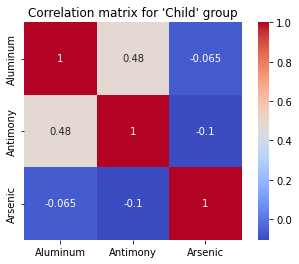

In [257]:
# Compute correlation matrix for aluminum, antimony, and arsenic levels by group
elements = ['Aluminum', 'Antimony', 'Arsenic']
corr_matrix = clean_data2.groupby('Type')[elements].corr()

# Select correlation matrix for 'Child' group
corr_child = corr_matrix.loc['Child', elements]

# Plot correlation matrix
sns.heatmap(corr_child, cmap='coolwarm', annot=True, square=True)
plt.title("Correlation matrix for 'Child' group")
plt.show()